In [34]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

In [35]:
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.palettes import Spectral11, colorblind, Inferno, BuGn, brewer
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource
from bokeh.models import LinearColorMapper,BasicTicker, PrintfTickFormatter, ColorBar

In [36]:
train = pd.read_csv('train.csv',sep=";")
test = pd.read_csv('test.csv',sep=";")

print(train.shape)
print(test.shape)

(11999, 17)
(5380, 17)


In [37]:
train



,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1.01.2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,1.01.2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,1.01.2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,1.01.2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,1.01.2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,1.01.2011,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,1.01.2011,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,1.01.2011,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,1.01.2011,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,1.01.2011,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [38]:
test

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,12000,20.05.2012,2,1,5,4,0,0,0,1,0.52,0.5000,0.68,0.0896,2,14,16
1,12001,20.05.2012,2,1,5,5,0,0,0,1,0.50,0.4848,0.72,0.1045,1,7,8
2,12002,20.05.2012,2,1,5,6,0,0,0,1,0.50,0.4848,0.63,0.1343,4,21,25
3,12003,20.05.2012,2,1,5,7,0,0,0,1,0.52,0.5000,0.68,0.1940,35,55,90
4,12004,20.05.2012,2,1,5,8,0,0,0,1,0.56,0.5303,0.56,0.1642,51,120,171
5,12005,20.05.2012,2,1,5,9,0,0,0,1,0.62,0.6212,0.32,0.2537,129,184,313
6,12006,20.05.2012,2,1,5,10,0,0,0,1,0.66,0.6212,0.34,0.2985,174,258,432
7,12007,20.05.2012,2,1,5,11,0,0,0,1,0.66,0.6212,0.36,0.3284,258,323,581
8,12008,20.05.2012,2,1,5,12,0,0,0,1,0.68,0.6364,0.36,0.3284,247,390,637
9,12009,20.05.2012,2,1,5,13,0,0,0,1,0.70,0.6364,0.37,0.2836,244,363,607


In [39]:
train['mnth'].value_counts()

3     1473
4     1437
1     1429
2     1341
5     1204
7      744
10     743
12     741
8      731
6      720
11     719
9      717
Name: mnth, dtype: int64

In [40]:
train['dteday'] = pd.to_datetime(train['dteday']) 
for index, row in train.iterrows():

    row['dteday'].tz_localize('UTC').tz_convert('US/Eastern')
    
test['dteday'] = pd.to_datetime(train['dteday']) 
for index, row in test.iterrows():

    row['dteday'].tz_localize('UTC').tz_convert('US/Eastern')





In [41]:
for i in (train, test):
    i['year'] = i.dteday.dt.year 
    i['month'] = i.dteday.dt.month 
    i['day'] = i.dteday.dt.day
   
    
print(train.head(2))
print(test.head(2))

   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  year  \
0           1  0.24  0.2879  0.81        0.0       3          13   16  2011   
1           1  0.22  0.2727  0.80        0.0       8          32   40  2011   

   month  day  
0      1    1  
1      1    1  
   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0    12000 2011-01-01       2   1     5   4        0        0           0   
1    12001 2011-01-01       2   1     5   5        0        0           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  year  \
0           1  0.52  0.5000  0.68     0.0896       2          14   16  2011   
1           1  0.50  0.4848  0.72     0.1045       1           7    8  2011   

   month  da

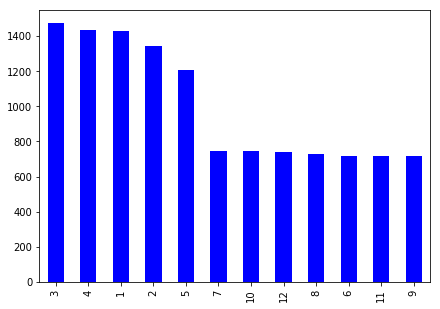

In [42]:

train['mnth'].value_counts().plot.bar(color = 'blue', figsize = (7, 5))

In [43]:
TOOLS = "save, pan, box_zoom, reset, wheel_zoom, tap"

output_file("line_chart_ts.html", title = 'Line_chart')
x = train.dteday
y = train.cnt

output_notebook()
p = figure(tools = TOOLS, title="Bike Count through Time", y_axis_type="linear", x_axis_type='datetime')
p.line(x, y)
show(p)

Loading BokehJS ...

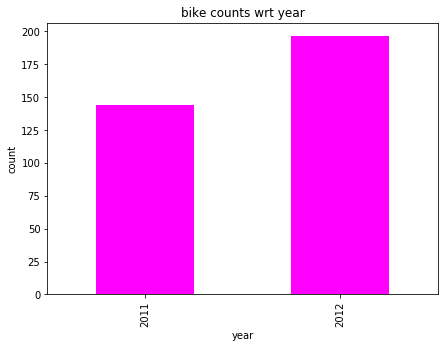

In [44]:
train.groupby('year')['cnt'].mean().plot.bar(color = 'magenta', figsize = (7, 5))
plt.title('bike counts wrt year')
plt.ylabel('count')
plt.show()

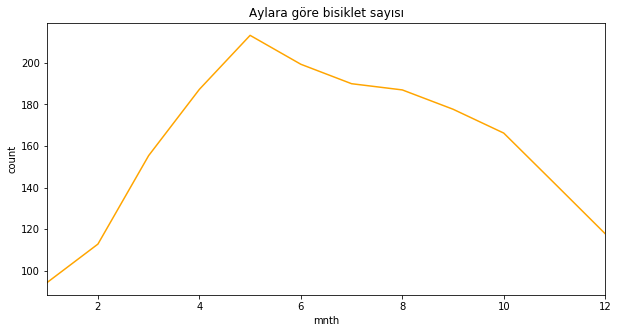

In [45]:
train.groupby('mnth')['cnt'].mean().plot.line(color = 'orange', figsize = (10, 5))
plt.title('Aylara göre bisiklet sayısı')
plt.ylabel('count')
plt.show()

In [46]:
train.Timestamp = pd.to_datetime(train.dteday,format='%d.%m.%Y ') 
train.index = train.Timestamp



# Converting to daily mean
daily = train.resample('D').mean()


# Converting to monthly mean
monthly = train.resample('M').mean()

c:\users\cansu kaplan\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


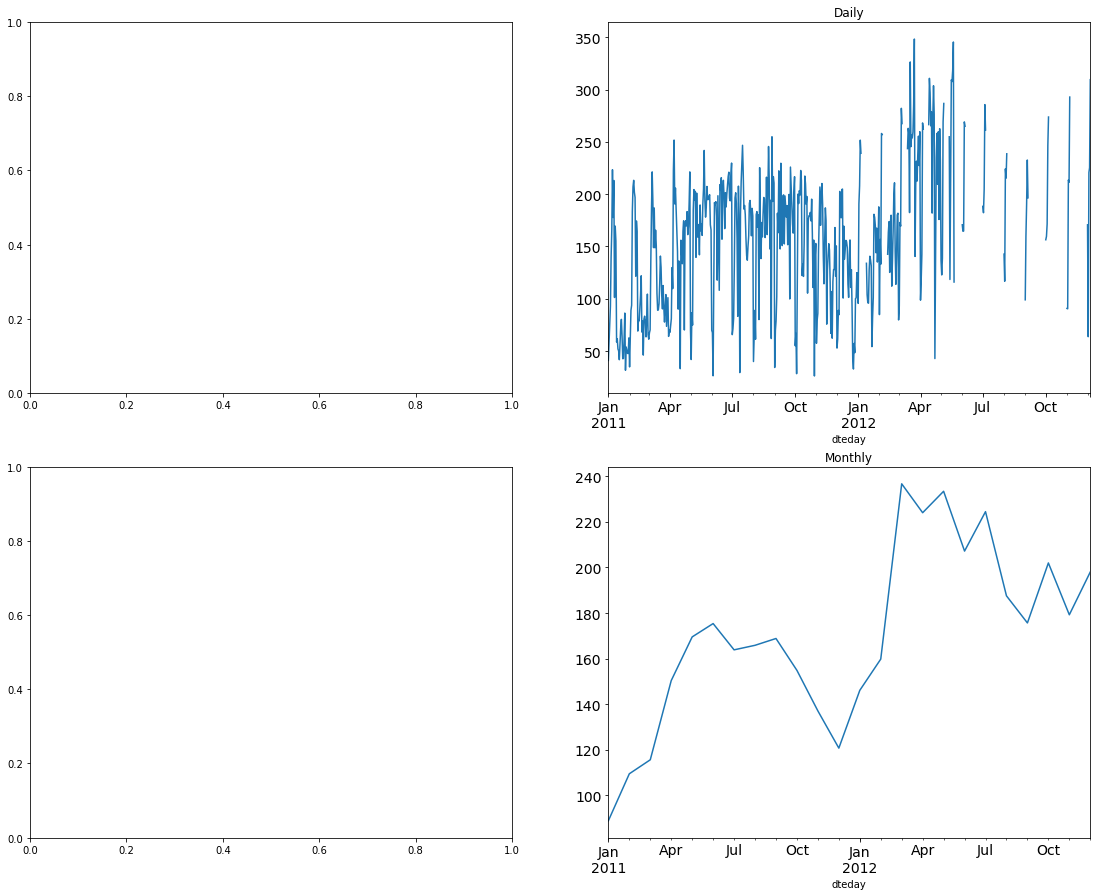

In [47]:
fig, axs = plt.subplots(2, 2)

daily.cnt.plot(figsize=(19,15), title= 'Daily', fontsize=14, ax=axs[0, 1])
monthly.cnt.plot(figsize=(19,15), title= 'Monthly', fontsize=14, ax=axs[1, 1])


plt.show()

In [49]:
test.Timestamp = pd.to_datetime(test.dteday,format='%d.%m.%Y') 
test.index = test.Timestamp 

# Converting to daily mean
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.dteday,format='%d.%m.%Y') 
train.index = train.Timestamp

# Converting to daily mean
train = train.resample('D').mean()

AttributeError: 'DataFrame' object has no attribute 'dteday'

In [ ]:
train.info()

In [50]:
train.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,day
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,5973.293478,2.201581,0.278656,5.501976,11.558805,0.027668,3.000000,0.683794,1.436068,0.464234,0.447551,0.625909,0.196347,29.871305,127.893955,157.765260,2011.278656,5.916996,15.079051
std,3487.446136,1.089499,0.448782,3.439001,0.695986,0.164182,2.006919,0.465454,0.444993,0.178709,0.160241,0.152579,0.078834,25.966190,50.158805,64.882443,0.448782,3.493846,9.175391
min,12.500000,1.000000,0.000000,1.000000,1.500000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,0.750000,19.608696,26.125000,2011.000000,1.000000,1.000000
25%,2948.500000,1.000000,0.000000,3.000000,11.500000,0.000000,1.000000,0.000000,1.043478,0.317690,0.318337,0.506988,0.138060,9.562500,88.343750,103.906250,2011.000000,3.000000,6.000000
50%,5963.500000,2.000000,0.000000,5.000000,11.500000,0.000000,3.000000,1.000000,1.291667,0.456667,0.446950,0.626250,0.189065,25.562500,133.125000,164.677536,2011.000000,5.000000,15.000000
75%,8985.500000,3.000000,1.000000,8.000000,11.500000,0.000000,5.000000,1.000000,1.688406,0.613125,0.574522,0.738125,0.239300,37.854167,160.562500,199.468750,2012.000000,9.000000,23.000000
max,11997.500000,4.000000,1.000000,12.000000,19.500000,1.000000,6.000000,1.000000,2.937500,0.849167,0.840896,0.972500,0.507463,142.083333,268.041667,348.416667,2012.000000,12.000000,31.000000


In [51]:
Train = train.loc['2011-01-01':'2011-11-10']
valid = train.loc['2011-11-11':'2012-05-20']

print(train.shape)
print(valid.shape)

(705, 19)
(192, 19)


In [52]:
X=Train.drop('day', axis=1)
y=Train['day']



In [53]:

from sklearn.model_selection import train_test_split

In [54]:
x_Train, x_valid, y_Train, y_valid = train_test_split(X, y, test_size=0.25, random_state=0)

In [55]:
#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_Train,y_Train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

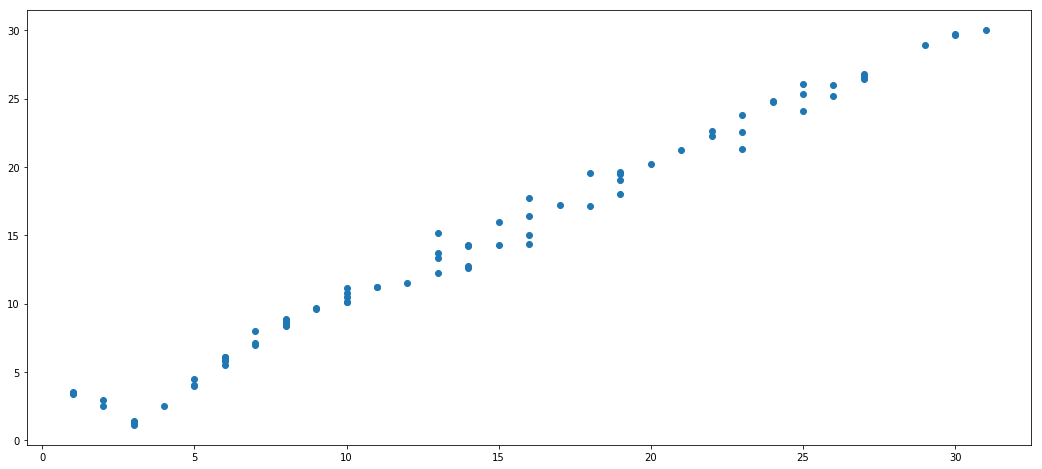

In [56]:
predictions = model.predict(x_valid)
plt.scatter(y_valid,predictions)


In [57]:
x_valid = x_valid.as_matrix().astype(np.float)

c:\users\cansu kaplan\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [26]:
 req = model.score(x_Train, y_Train)
 print ( req)

0.9872210434562281


In [27]:
predicted = model.predict(x_valid)
predicted

array([ 7.98638963, 10.4902426 , 30.02584609,  8.85856977, 18.02138897,
        1.40670478, 15.03624706, 26.54480266, 14.37057129, 20.23174704,
       26.7982612 , 19.64725074, 22.22252873, 29.74291782,  2.54448954,
       12.63793278, 12.27007857,  8.67181923, 23.79773156,  6.0842603 ,
       11.11120729, 25.98519885, 13.31292213,  8.34656527, 25.21452447,
       17.69588742, 11.51224961, 22.61289204, 26.05407817, 15.17246241,
        5.54144785,  8.74287648, 14.17952273, 28.93139038,  3.96795765,
       19.48522169, 10.15456081,  8.41708307, 16.44315151, 17.23258792,
        7.11011466,  1.13110136,  6.95652977, 22.52223785, 11.18905888,
        3.55952674, 17.10840503, 10.78445308,  5.7787323 , 19.53428907,
        3.40240145,  9.62757488, 24.08577591,  3.46357006,  2.94705346,
        4.52117727,  4.02600849, 24.83808791,  9.68437008, 25.29367899,
        5.94951854,  1.34375506, 21.24740515,  6.0882279 ,  2.50743041,
       29.65617537, 24.77590677, 21.34179947, 15.94993414,  1.33

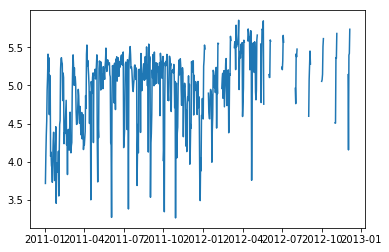

In [28]:
Train_log = np.log(train['cnt'])
plt.plot(Train_log)

In [29]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=24).mean() # 24 hours on each day
    rolstd = timeseries.rolling(window=24).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    print (dfoutput)

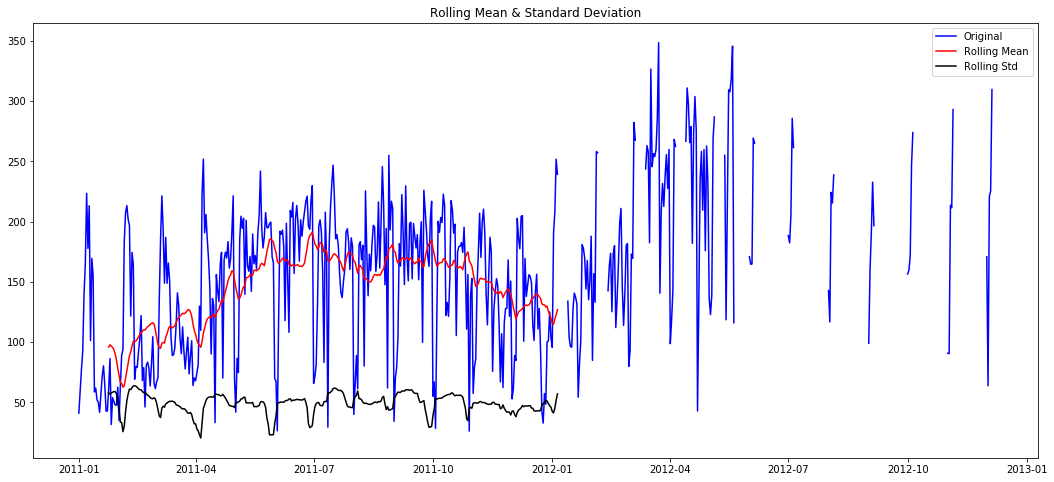

Results of Dickey-Fuller Test:


MissingDataError: exog contains inf or nans

In [30]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18, 8

test_stationarity(train['cnt'])

In [31]:
Train_log = Train['cnt']
valid_log = valid['cnt']



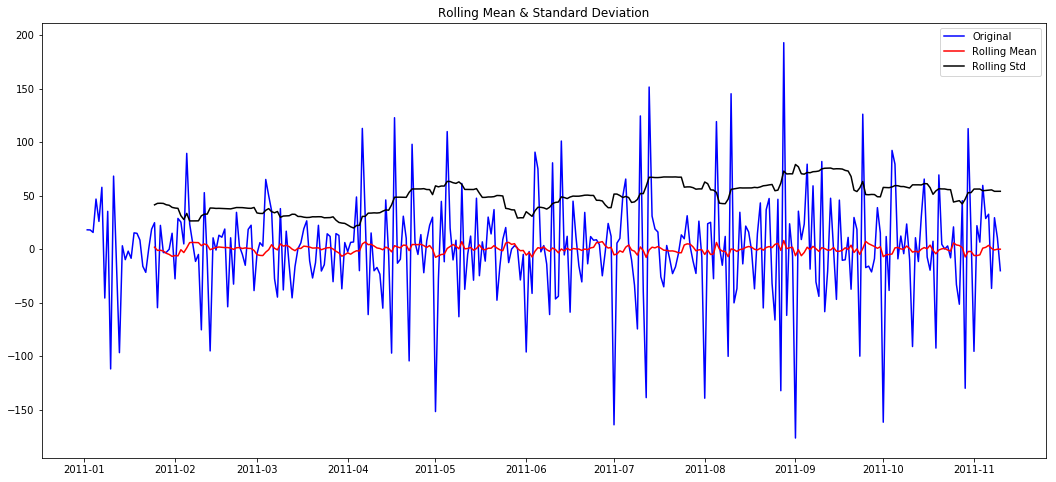

Results of Dickey-Fuller Test:
Test Statistic                -9.456179e+00
p-value                        4.478858e-16
#Lags Used                     8.000000e+00
Number of Observations Used    3.040000e+02
Critical Value (1%)           -3.452045e+00
Critical Value (5%)           -2.871095e+00
Critical Value (10%)          -2.571861e+00
dtype: float64


In [32]:
train_log_diff = Train_log - Train_log.shift(1)
test_stationarity(train_log_diff.dropna())

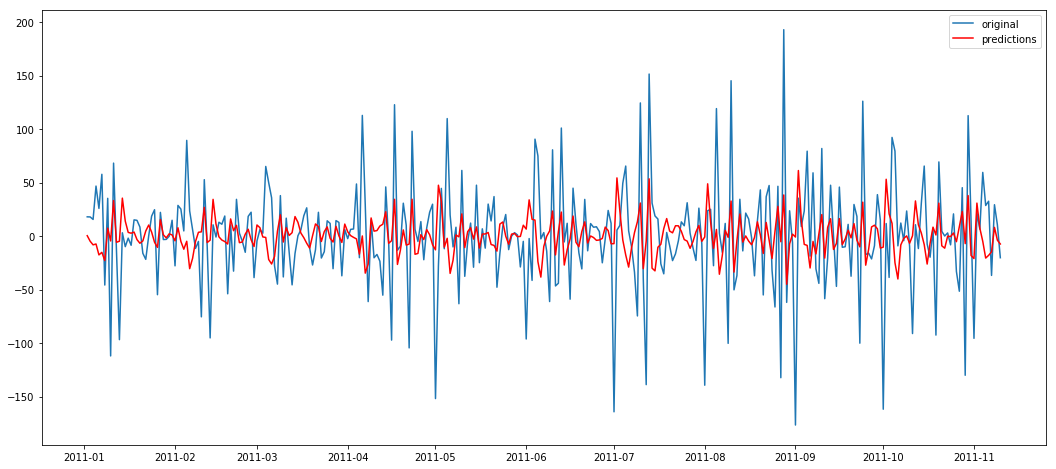

In [33]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(Train_log, order=(2, 1, 0))  # here the q value is zero since it is just the AR model
results_AR = model.fit(disp=-1)  


plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_AR.fittedvalues, color='red', label='predictions')
plt.legend(loc='best')
plt.show()

In [115]:
test = pd.read_csv('day.csv',sep=";")


In [116]:
x=test["mnth"]
y=test["cnt"]
x=pd.DataFrame.as_matrix(x)
y=pd.DataFrame.as_matrix(y)

c:\users\cansu kaplan\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\cansu kaplan\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [117]:
print(x)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11

In [118]:
print(y)


[ 985  801 1349 1562 1600 1606 1510  959  822 1321 1263 1162 1406 1421
 1248 1204 1000  683 1650 1927 1543  981  986 1416 1985  506  431 1167
 1098 1096 1501 1360 1526 1550 1708 1005 1623 1712 1530 1605 1538 1746
 1472 1589 1913 1815 2115 2475 2927 1635 1812 1107 1450 1917 1807 1461
 1969 2402 1446 1851 2134 1685 1944 2077  605 1872 2133 1891  623 1977
 2132 2417 2046 2056 2192 2744 3239 3117 2471 2077 2703 2121 1865 2210
 2496 1693 2028 2425 1536 1685 2227 2252 3249 3115 1795 2808 3141 1471
 2455 2895 3348 2034 2162 3267 3126  795 3744 3429 3204 3944 4189 1683
 4036 4191 4073 4400 3872 4058 4595 5312 3351 4401 4451 2633 4433 4608
 4714 4333 4362 4803 4182 4864 4105 3409 4553 3958 4123 3855 4575 4917
 5805 4660 4274 4492 4978 4677 4679 4758 4788 4098 3982 3974 4968 5312
 5342 4906 4548 4833 4401 3915 4586 4966 4460 5020 4891 5180 3767 4844
 5119 4744 4010 4835 4507 4790 4991 5202 5305 4708 4648 5225 5515 5362
 5119 4649 6043 4665 4629 4592 4040 5336 4881 4086 4258 4342 5084 5538
 5923 

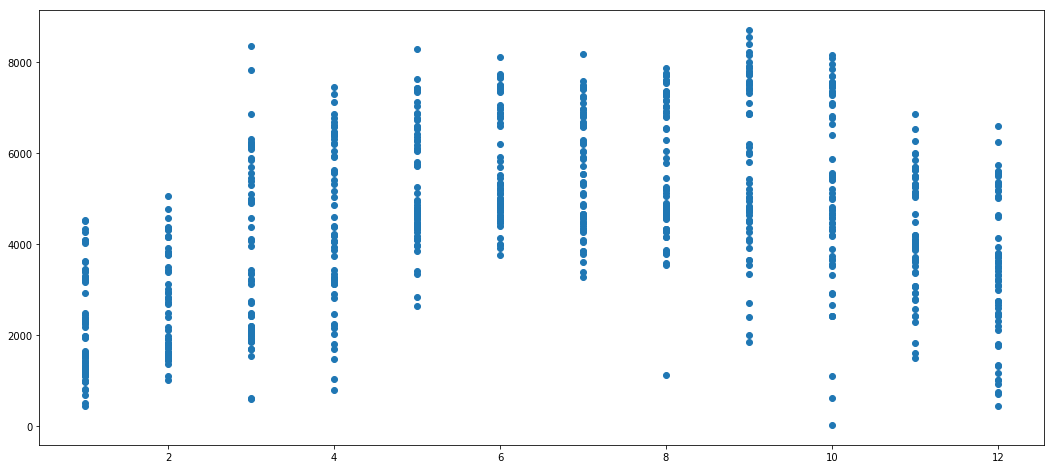

In [119]:

plt.scatter(x,y)

In [120]:
is_12=test['mnth']==12
print(is_12.head())

0    False
1    False
2    False
3    False
4    False
Name: mnth, dtype: bool


In [121]:
tahmin_12 = test[is_12]
print(tahmin_12.shape)

(62, 16)


In [122]:
train_2=tahmin_12['cnt'].count()
print(train_2)


62


In [132]:
m,b=np.polyfit(x,y,1)

In [133]:

z=int(input("kaç ay?"))
tahmin=m*z+b
print(tahmin)

kaç ay?12
5365.408630800347


In [134]:
tahmin_2=tahmin*train_2
print(tahmin_2)

332655.3351096215


In [135]:
is_12=test['mnth']==12
print(is_12.head())


0    False
1    False
2    False
3    False
4    False
Name: mnth, dtype: bool


In [136]:
gapminder_12 = test[is_12]
print(gapminder_12.shape)

(62, 16)


In [137]:
print(gapminder_12.head(50))


     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
334      335   1.12.2011       4   0    12        0        4           1   
335      336   2.12.2011       4   0    12        0        5           1   
336      337   3.12.2011       4   0    12        0        6           0   
337      338   4.12.2011       4   0    12        0        0           0   
338      339   5.12.2011       4   0    12        0        1           1   
339      340   6.12.2011       4   0    12        0        2           1   
340      341   7.12.2011       4   0    12        0        3           1   
341      342   8.12.2011       4   0    12        0        4           1   
342      343   9.12.2011       4   0    12        0        5           1   
343      344  10.12.2011       4   0    12        0        6           0   
344      345  11.12.2011       4   0    12        0        0           0   
345      346  12.12.2011       4   0    12        0        1           1   
346      347

In [138]:
train=gapminder_12['cnt'].sum()
print(train)



211036


In [139]:
accuracy=100*train/tahmin_2
print(accuracy)

 


63.43983628894943
